In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data_cleaned.csv',encoding='utf-8',index_col=0)
df.head(3)

,address,buildingSize,city,listingDate,price,propType,spaceAvailable,spaces,state,subType,utilities,yearBuilt,yearRenovated,propInfo,ceilingHeight,lat,lon,Region,Division,spaceClass
0,"11907 General Dr Charlotte, NC",243072.0,Charlotte,2019-02-28,0.440,Industrial,243072,1,NC,Industrial,[],2020,2020,"new space, never previously occupied,lease r...",16,35.248292,-80.82748,South,South Atlantic,large
1,"1427 Boulder Ct Greensboro, NC",23000.0,Greensboro,2019-07-15,0.665,Industrial,21000,4,NC,Industrial,"['Sewer', 'Well', 'Septic']",1995,1995,"available for lease,dock high & drive-in door,...",16,NaN,NaN,South,South Atlantic,small
2,"819 Baker Rd High Point, NC",19764.0,High Point,2019-11-04,0.310,Industrial,19764,1,NC,Industrial,['Sewer'],1977,1977,"upgraded to led lighting,fenced and gated lay ...",16,36.080707,-80.02440,South,South Atlantic,small


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9217 entries, 0 to 9216
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   address         9217 non-null   object 
 1   buildingSize    9216 non-null   float64
 2   city            9217 non-null   object 
 3   listingDate     9217 non-null   object 
 4   price           9217 non-null   float64
 5   propType        9217 non-null   object 
 6   spaceAvailable  9217 non-null   int64  
 7   spaces          9217 non-null   int64  
 8   state           9217 non-null   object 
 9   subType         9217 non-null   object 
 10  utilities       9217 non-null   object 
 11  yearBuilt       9217 non-null   int64  
 12  yearRenovated   9217 non-null   int64  
 13  propInfo        9217 non-null   object 
 14  ceilingHeight   9217 non-null   int64  
 15  lat             6244 non-null   float64
 16  lon             6244 non-null   float64
 17  Region          9217 non-null   o

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9217 entries, 0 to 9216
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   address         9217 non-null   object 
 1   buildingSize    9216 non-null   float64
 2   city            9217 non-null   object 
 3   listingDate     9217 non-null   object 
 4   price           9217 non-null   float64
 5   propType        9217 non-null   object 
 6   spaceAvailable  9217 non-null   int64  
 7   spaces          9217 non-null   int64  
 8   state           9217 non-null   object 
 9   subType         9217 non-null   object 
 10  utilities       9217 non-null   object 
 11  yearBuilt       9217 non-null   int64  
 12  yearRenovated   9217 non-null   int64  
 13  propInfo        9217 non-null   object 
 14  ceilingHeight   9217 non-null   int64  
 15  lat             6244 non-null   float64
 16  lon             6244 non-null   float64
 17  Region          9217 non-null   o

In [5]:
df.shape

(9217, 20)

In [6]:
df.isna().sum()

address              0
buildingSize         1
city                 0
listingDate          0
price                0
propType             0
spaceAvailable       0
spaces               0
state                0
subType              0
utilities            0
yearBuilt            0
yearRenovated        0
propInfo             0
ceilingHeight        0
lat               2973
lon               2973
Region               0
Division             0
spaceClass           0
dtype: int64

In [7]:
df.duplicated().sum()

8

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.groupby('Region').agg(count = ('address','count'))

,count
Region,
Midwest,2503
Northeast,1597
South,3013
West,2096


In [10]:
df.columns

Index(['address', 'buildingSize', 'city', 'listingDate', 'price', 'propType',
       'spaceAvailable', 'spaces', 'state', 'subType', 'utilities',
       'yearBuilt', 'yearRenovated', 'propInfo', 'ceilingHeight', 'lat', 'lon',
       'Region', 'Division', 'spaceClass'],
      dtype='object')

In [11]:
df = df[['address', 'buildingSize', 'city', 'listingDate', 'price', 'propType',
       'spaceAvailable', 'spaces', 'state', 'subType', 'utilities',
       'yearBuilt', 'yearRenovated', 'propInfo', 'ceilingHeight', 
       'Region', 'Division', 'spaceClass']]

In [12]:
df['text_count'] = df['utilities'].str.len()

In [13]:
df['count_utilitites'] = np.where(df['text_count'] == 2, 0, df['utilities'].str.count(',') + 1 )

In [14]:
df

,address,buildingSize,city,listingDate,price,propType,spaceAvailable,spaces,state,subType,utilities,yearBuilt,yearRenovated,propInfo,ceilingHeight,Region,Division,spaceClass,text_count,count_utilitites
0,"11907 General Dr Charlotte, NC",243072.0,Charlotte,2019-02-28,0.440,Industrial,243072,1,NC,Industrial,[],2020,2020,"new space, never previously occupied,lease r...",16,South,South Atlantic,large,2,0
1,"1427 Boulder Ct Greensboro, NC",23000.0,Greensboro,2019-07-15,0.665,Industrial,21000,4,NC,Industrial,"['Sewer', 'Well', 'Septic']",1995,1995,"available for lease,dock high & drive-in door,...",16,South,South Atlantic,small,27,3
2,"819 Baker Rd High Point, NC",19764.0,High Point,2019-11-04,0.310,Industrial,19764,1,NC,Industrial,['Sewer'],1977,1977,"upgraded to led lighting,fenced and gated lay ...",16,South,South Atlantic,small,9,1
3,"2829 Rosemont Dr Charlotte, NC",3600.0,Charlotte,2020-01-16,0.630,Industrial,3600,1,NC,Industrial,"['Heating', 'Sewer']",1968,1968,convenient location just off wilkinson blvd./ ...,16,South,South Atlantic,small,20,2
4,"222 Washington St Mount Vernon, NY",18000.0,Mount Vernon,2015-11-11,1.500,Industrial,18000,2,NY,Industrial,[],1943,1943,listed rate may not include certain utilitie...,16,Northeast,Middle Atlantic,small,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9212,"246 Jacintoport Blvd Saraland, AL",22400.0,Saraland,2017-03-06,0.630,Industrial,5400,1,AL,Industrial,[],2003,2003,"(1) dock height door,skylights,insulated walls...",16,South,East South Central,small,2,0
9213,"3520-3552 Lorna Ridge Dr Birmingham, AL",12500.0,Birmingham,2019-06-27,0.730,Flex,3240,1,AL,Flex,[],1986,1986,"±40,365 sf multi-tenant park; recently renova...",16,South,East South Central,small,2,0
9214,"5155 Mobile South St Mobile, AL",34000.0,Mobile,2008-12-10,0.380,Industrial,34000,1,AL,Industrial,"['Lighting', 'Sewer']",2007,2007,"lease price includes outside maintenance, wat...",16,South,East South Central,small,21,2
9215,"13800 Mooresville Rd Athens, AL",130000.0,Athens,2019-04-08,0.400,Industrial,90000,3,AL,Industrial,[],1999,1999,listed rate may not include certain utilitie...,16,South,East South Central,medium,2,0


In [15]:
# df.to_csv('warehouse_cleaned.csv')

In [16]:
import seaborn as sns

In [17]:
df.columns

Index(['address', 'buildingSize', 'city', 'listingDate', 'price', 'propType',
       'spaceAvailable', 'spaces', 'state', 'subType', 'utilities',
       'yearBuilt', 'yearRenovated', 'propInfo', 'ceilingHeight', 'Region',
       'Division', 'spaceClass', 'text_count', 'count_utilitites'],
      dtype='object')

In [19]:
df['spaceClass'].unique()

array(['large', 'small', 'medium'], dtype=object)

<Axes: xlabel='price', ylabel='Count'>

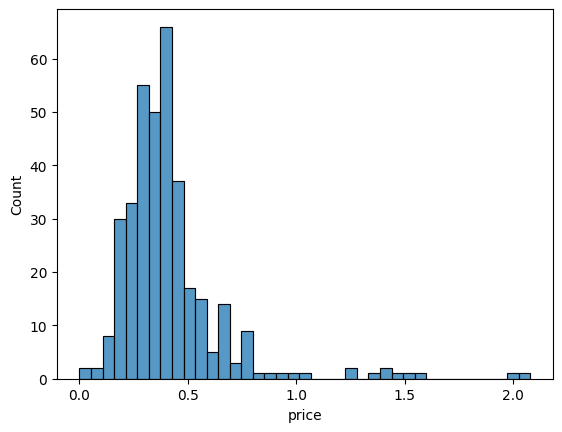

In [20]:
sns.histplot(data=df[df['spaceClass']=='large'], x = 'price')

<Axes: xlabel='price', ylabel='Count'>

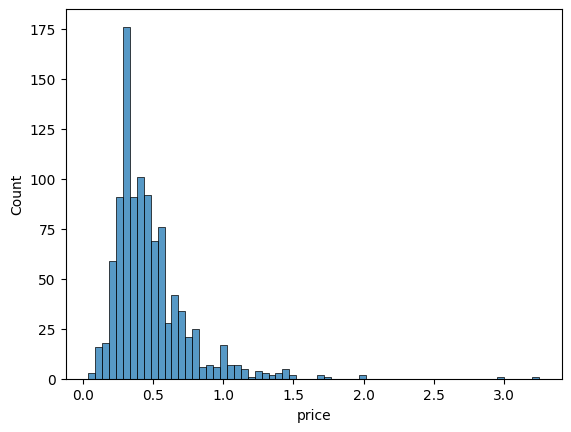

In [21]:
sns.histplot(data=df[df['spaceClass']=='medium'], x = 'price')

<Axes: xlabel='price', ylabel='Count'>

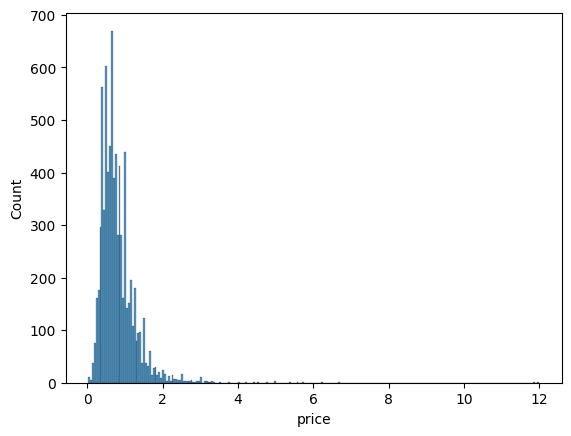

In [22]:
sns.histplot(data=df[df['spaceClass']=='small'], x = 'price')

In [23]:
#pip install plotly
import plotly.express as px

In [27]:
px.histogram(df[df['spaceClass']=='small'], x='price')

In [26]:
px.histogram(df[df['spaceClass']=='medium'], x='price')

In [28]:
px.histogram(df[df['spaceClass']=='large'], x='price')